<a href="https://colab.research.google.com/github/dmousa75/stqd6014-Data-Science/blob/main/Project2_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install pandas emoji
!pip install nltk
!pip install textblob
!pip install wordcloud
!pip install plotly

In [36]:
# Import NumPy, Pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#Read the file 'tweet_1.csv'

In [22]:
file_path = ('/content/drive/MyDrive/Project 2 Dr Bernard/tweets_1.csv')

In [23]:
df = pd.read_csv(file_path)

In [24]:
df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50001 non-null  object 
 1   Date        50001 non-null  object 
 2   User        50001 non-null  object 
 3   Tweet       50000 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


##Resampling the data to 15%

In [26]:
sampled_df = df.sample(frac=0.15, random_state=42)

In [27]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 33553 to 3594
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7500 non-null   object 
 1   Date        7500 non-null   object 
 2   User        7500 non-null   object 
 3   Tweet       7500 non-null   object 
 4   Likes       7500 non-null   float64
 5   Retweets    7500 non-null   float64
dtypes: float64(2), object(4)
memory usage: 410.2+ KB


In [28]:
#check for NaN values
nan_counts = sampled_df.isna().sum()
print(nan_counts)

Unnamed: 0    0
Date          0
User          0
Tweet         0
Likes         0
Retweets      0
dtype: int64


##Pre-process the texts

In [29]:
#functio to reprocess text
def preprocess_text(text):
  #convert emojis to text
  text = emoji.demojize(text)
  #remove special characters
  text = re.sub(r'[^\w\s]', '', text)
  #Tokenize text
  tokens = word_tokenize(text)
  #Remove stopwords
  token = [word for word in tokens if word.lower() not in stopwords.words('english')]
  return tokens

In [37]:
##Apply preprocessing to the 'Tweet' column
sampled_df['tokens'] = sampled_df['Tweet'].apply(preprocess_text)

##Perform Sentiment Analysis

In [42]:
print(sampled_df['tokens'])

33553    [desimojito, Yeah, and, since, 2014, Modi, has...
9427     [Felix, Pal, is, a, qualitative, PoliticalScie...
199      [ShefVaidya, RahulGandhi, Never, seen, any, ot...
12447    [amitmalviya, Your, leadership, is, lying, eve...
39489    [Politics_2022_, mayank_sxn, Thats, the, same,...
                               ...                        
30956    [AniketG92, TARUNspeakss, We, need, PAA, Polit...
14861    [Check, out, my, latest, article, Privileges, ...
6166     [KartiPC, YouTube, ShivaniGupta_5, INCIndia, C...
35101    [AbhishBanerj, ShefVaidya, She, should, have, ...
3594     [sreemoytalukdar, Expecting, wester, Indian, w...
Name: tokens, Length: 7500, dtype: object


In [38]:
#use TextBlob to perform sentiment analysis on the preprocessed twets
from textblob import TextBlob

def get_sentiment(tokens):
  sentiment = TextBlob(' '.join(tokens)).sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'



In [44]:
#Apply the get_sentiment function to the 'tokens' column and store the results in a new column 'sentiment'
sampled_df['sentiment'] = sampled_df['tokens'].apply(get_sentiment)


In [45]:
#Print the 'sentiment' column
print(sampled_df['sentiment'])

33553    Negative
9427     Positive
199      Negative
12447    Positive
39489     Neutral
           ...   
30956     Neutral
14861    Positive
6166     Negative
35101    Negative
3594     Positive
Name: sentiment, Length: 7500, dtype: object


In [46]:
#check column 'sentiment' added to dataframe
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,tokens,sentiment
33553,33552,2022-12-02 10:51:11+00:00,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0,"[desimojito, Yeah, and, since, 2014, Modi, has...",Negative
9427,9427,2023-03-07 04:05:38+00:00,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0,"[Felix, Pal, is, a, qualitative, PoliticalScie...",Positive
199,199,2023-03-29 09:36:41+00:00,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0,"[ShefVaidya, RahulGandhi, Never, seen, any, ot...",Negative
12447,12447,2023-02-25 10:38:25+00:00,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0,"[amitmalviya, Your, leadership, is, lying, eve...",Positive
39489,39488,2022-11-11 11:20:19+00:00,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0,"[Politics_2022_, mayank_sxn, Thats, the, same,...",Neutral


##Visualize the data

###Scatter Plot of Sentiments vs Likes

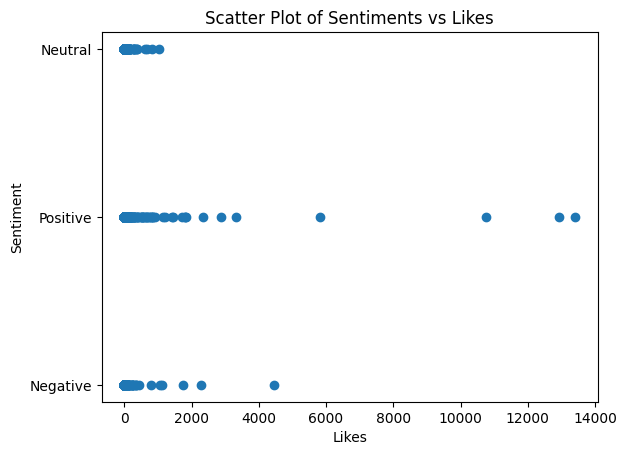

In [47]:
plt.scatter(sampled_df['Likes'], sampled_df['sentiment'])
plt.xlabel('Likes')
plt.ylabel('Sentiment')
plt.title('Scatter Plot of Sentiments vs Likes')
plt.show()

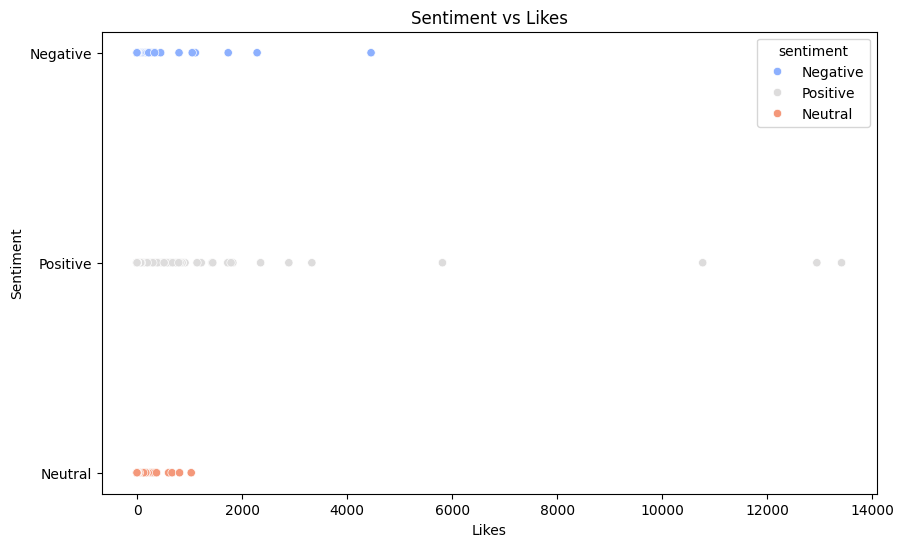

In [49]:
# Scatter plot of Sentiment vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='Likes', y='sentiment', hue='sentiment', palette='coolwarm')
plt.title('Sentiment vs Likes')
plt.xlabel('Likes')
plt.ylabel('Sentiment')
plt.show()


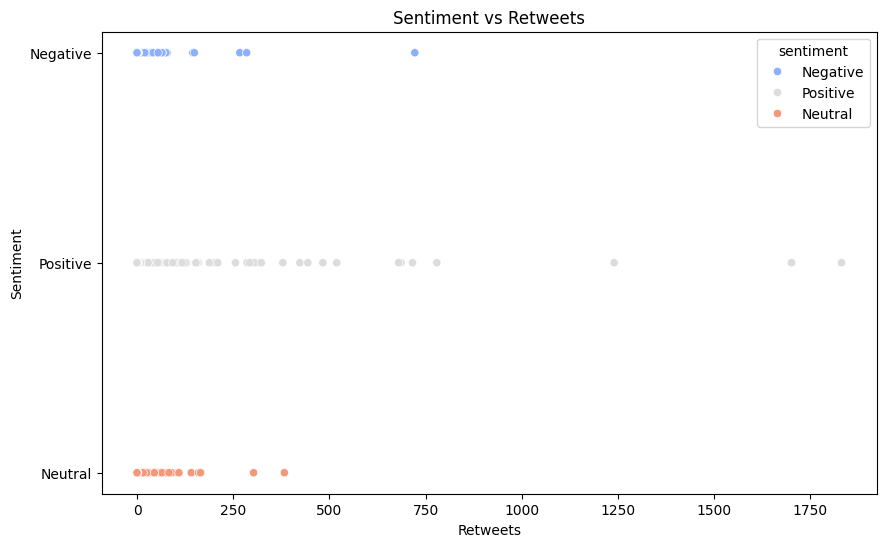

In [50]:
# Scatter plot of Sentiment vs Retweets
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='Retweets', y='sentiment', hue='sentiment', palette='coolwarm')
plt.title('Sentiment vs Retweets')
plt.xlabel('Retweets')
plt.ylabel('Sentiment')
plt.show()


###Histogram of Sentiment Scores

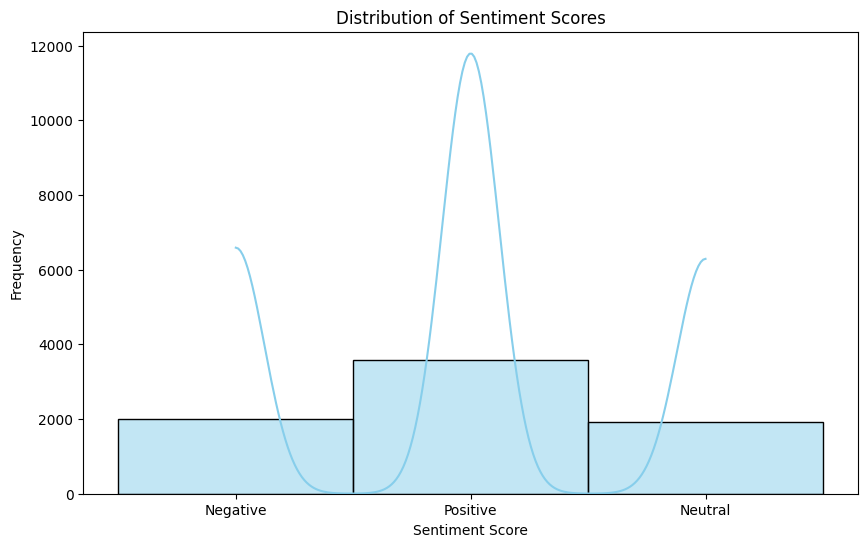

In [51]:
# Histogram of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=sampled_df, x='sentiment', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


###Wordcloud

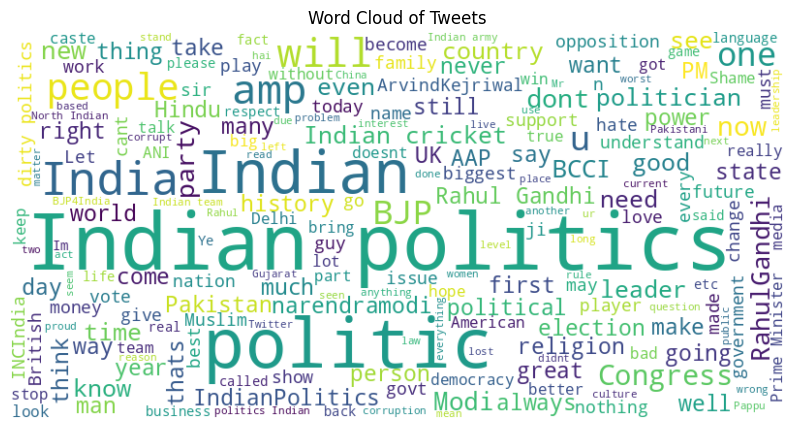

In [53]:
from wordcloud import WordCloud
# Combine all processed tweets into a single string
#Instead of using 'processed_tweet', use 'tokens' column which contains the processed tweets
all_words = ' '.join([' '.join(tweet) for tweet in sampled_df['tokens']])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

###BArplot for average sentiment by user

<ipython-input-54-bbf3e703de7d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sampled_df, x='User', y='sentiment', ci=None, palette='viridis')
<ipython-input-54-bbf3e703de7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sampled_df, x='User', y='sentiment', ci=None, palette='viridis')


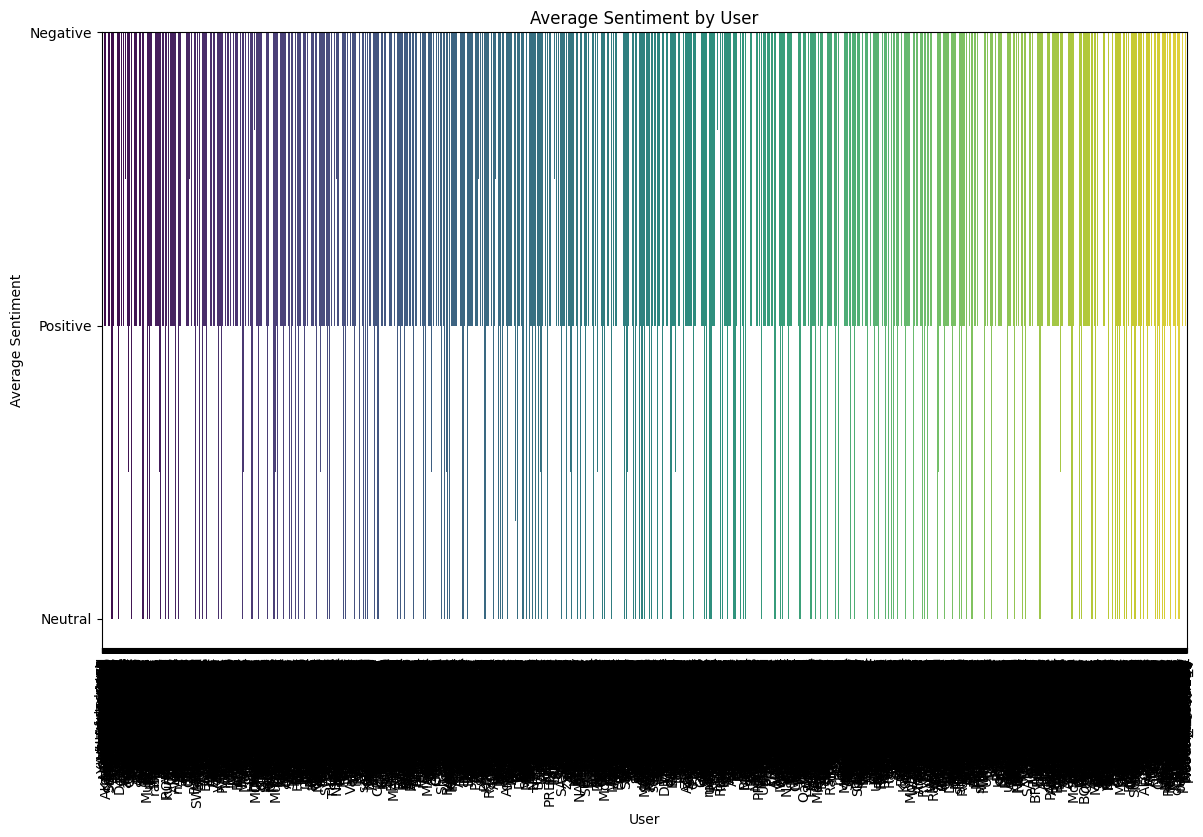

In [54]:
# Bar plot for average sentiment by user
plt.figure(figsize=(14, 8))
sns.barplot(data=sampled_df, x='User', y='sentiment', ci=None, palette='viridis')
plt.title('Average Sentiment by User')
plt.xlabel('User')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)
plt.show()

<ipython-input-59-d8f7fd6bf7af>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_sentiment, x='User', y='sentiment_numeric', palette='viridis')


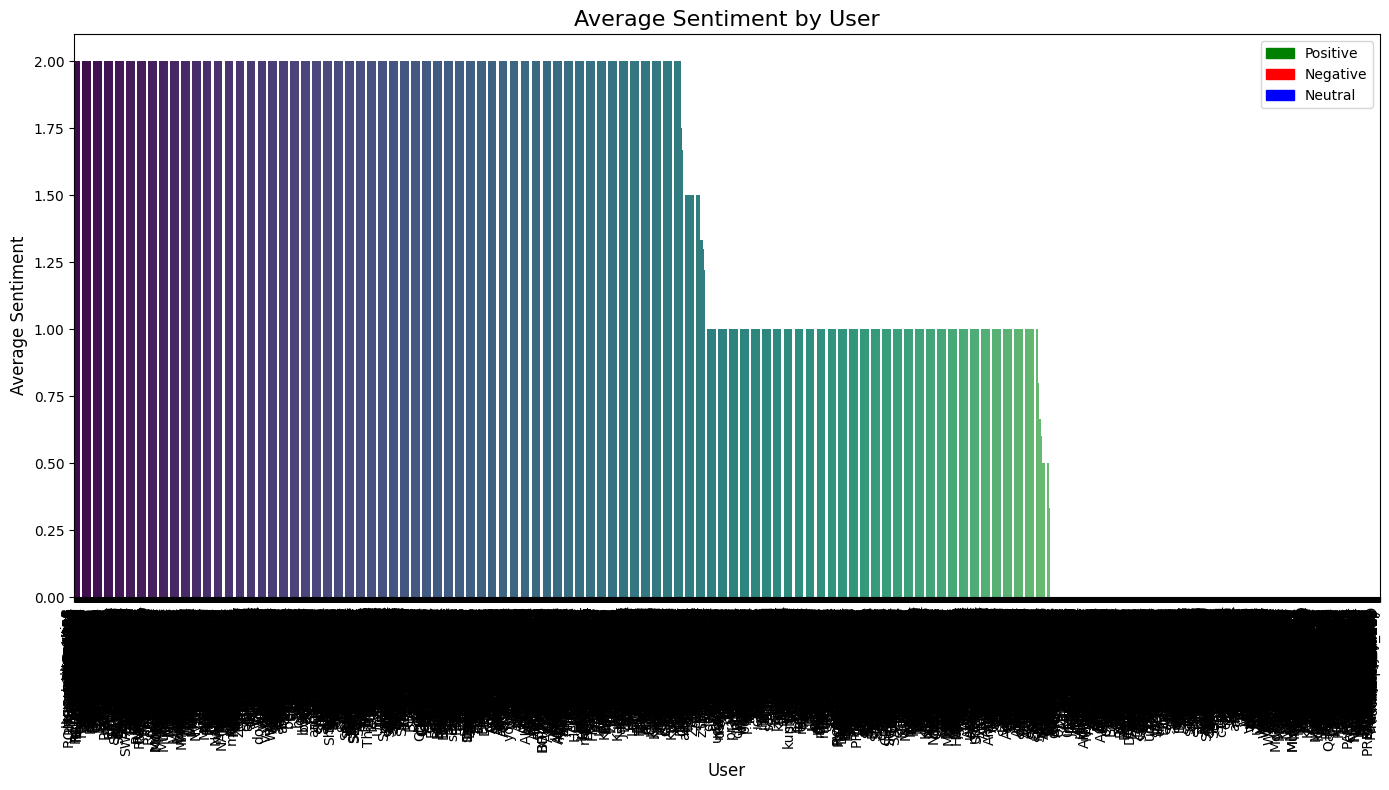

In [59]:
import matplotlib.patches as mpatches

# Bar plot for average sentiment by user
plt.figure(figsize=(14, 8))  # Adjust figure size for better spacing

# Calculate average sentiment for each user
average_sentiment = sampled_df.groupby('User')['sentiment_numeric'].mean().reset_index()
# Use sentiment_numeric for numerical representation

# Create custom legend handles
positive_patch = mpatches.Patch(color='green', label='Positive')  # Adjust color as needed
negative_patch = mpatches.Patch(color='red', label='Negative')   # Adjust color as needed
neutral_patch = mpatches.Patch(color='blue', label='Neutral')    # Adjust color as needed

# Sort users by average sentiment for better visualization
average_sentiment = average_sentiment.sort_values(by=['sentiment_numeric'], ascending=False)

# Create the barplot using Seaborn
sns.barplot(data=average_sentiment, x='User', y='sentiment_numeric', palette='viridis')

plt.title('Average Sentiment by User', fontsize=16)  # Increase title font size
plt.xlabel('User', fontsize=12)  # Increase x-axis label font size
plt.ylabel('Average Sentiment', fontsize=12)  # Increase y-axis label font size

plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and adjust x-axis tick labels
plt.tight_layout()  # Adjust layout to prevent overlapping elements
# Add legend to the plot
plt.legend(handles=[positive_patch, negative_patch, neutral_patch], loc='best')
plt.show()

###Pairplot

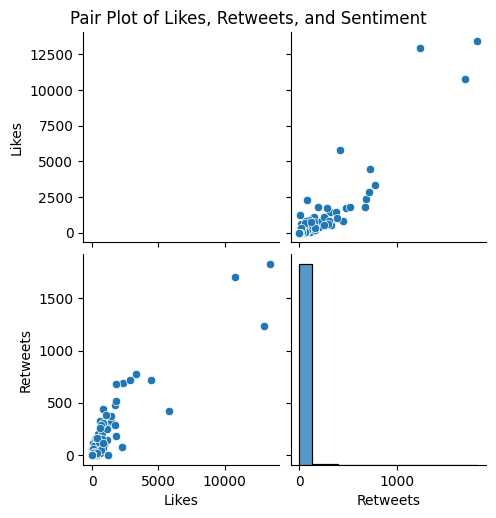

In [55]:
# Pair plot to visualize relationships between variables
sns.pairplot(sampled_df[['Likes', 'Retweets', 'sentiment']])
plt.suptitle('Pair Plot of Likes, Retweets, and Sentiment', y=1.02)
plt.show()


###Heatmap to show correlations

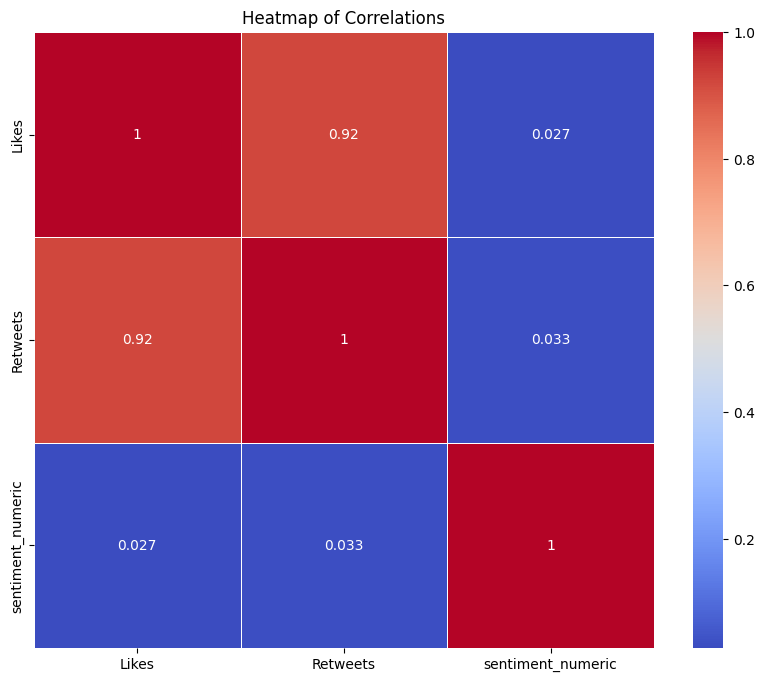

In [57]:
# Heatmap to show correlations
plt.figure(figsize=(10, 8))
# Convert 'sentiment' to numerical representation using pd.factorize or other methods
# Here, we map 'Negative' to 0, 'Neutral' to 1, and 'Positive' to 2
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
sampled_df['sentiment_numeric'] = sampled_df['sentiment'].map(sentiment_mapping)

# Calculate correlation matrix using the numerical representation of 'sentiment'
correlation_matrix = sampled_df[['Likes', 'Retweets', 'sentiment_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()